# 6.1 Reading and Writing Data in Text format 

## pd.read_csv()

In [0]:
import pandas as pd
import numpy as np

from pandas import Series, DataFrame

In [2]:
from google.colab import files

uploaded = files.upload()

Saving pokemon.csv to pokemon (1).csv


In [3]:
# makes the passed rows header

data = pd.read_csv("pokemon.csv", header = [1, 2])

data.head()

,Bulbasaur,Grass
,Ivysaur,Grass
0,Venusaur,Grass
1,Charmander,Fire
2,Charmeleon,Fire
3,Charizard,Fire
4,Squirtle,Water


In [4]:
# makes the passed column as index instead of 0, 1, 2,...

data = pd.read_csv("pokemon.csv", index_col = 'Type')

data.head()

,Pokemon
Type,
Grass,Bulbasaur
Grass,Ivysaur
Grass,Venusaur
Fire,Charmander
Fire,Charmeleon


In [5]:
# uses passed cols only for dataframe

data = pd.read_csv("pokemon.csv", usecols = ["Type"])

data.head()

,Type
0,Grass
1,Grass
2,Grass
3,Fire
4,Fire


In [6]:
# returns Pandas Series if there's only 1 column

data = pd.read_csv("pokemon.csv", usecols = ["Type"], 
                   squeeze = True)

data.head()

0    Grass
1    Grass
2    Grass
3     Fire
4     Fire
Name: Type, dtype: object

In [7]:
# skips the passed rows in new series

data = pd.read_csv("pokemon.csv", skiprows = [1, 2, 3, 4])

data.head()

,Pokemon,Type
0,Charmeleon,Fire
1,Charizard,Fire
2,Squirtle,Water
3,Wartortle,Water
4,Blastoise,Water


## pd.read_table()

In [8]:
data = pd.read_table("pokemon.csv")

data.head()

,"Pokemon,Type"
0,"Bulbasaur,Grass"
1,"Ivysaur,Grass"
2,"Venusaur,Grass"
3,"Charmander,Fire"
4,"Charmeleon,Fire"


In [9]:
data = pd.read_table("pokemon.csv", delimiter = ',',
                     names = ['Pokemon', 'Type'])

data.head()

,Pokemon,Type
0,Pokemon,Type
1,Bulbasaur,Grass
2,Ivysaur,Grass
3,Venusaur,Grass
4,Charmander,Fire


## pd.read_fwf()

In [10]:
data = pd.read_fwf("pokemon.csv")

data.head()

,"Pokemon,Type"
0,"Bulbasaur,Grass"
1,"Ivysaur,Grass"
2,"Venusaur,Grass"
3,"Charmander,Fire"
4,"Charmeleon,Fire"


In [11]:
data = pd.read_fwf("pokemon.csv", delimiter = ',',
                   names = ['Pokemon', 'Type'])

data.head()

,Pokemon,Type
0,"Pokemon,Type",NaN
1,"Bulbasaur,Grass",NaN
2,"Ivysaur,Grass",NaN
3,"Venusaur,Grass",NaN
4,"Charmander,Fire",NaN


In [12]:
data = pd.read_fwf("pokemon.csv", sep = ',',
                   names = ['Pokemon', 'Type'])

data.head()

,Pokemon,Type
0,"Pokemon,Type",NaN
1,"Bulbasaur,Grass",NaN
2,"Ivysaur,Grass",NaN
3,"Venusaur,Grass",NaN
4,"Charmander,Fire",NaN


In [13]:
widths = [
    15, #Pokemon
    10, #Type
]

data = pd.read_fwf("pokemon.csv", width = widths)

data.head()

,"Pokemon,Type"
0,"Bulbasaur,Grass"
1,"Ivysaur,Grass"
2,"Venusaur,Grass"
3,"Charmander,Fire"
4,"Charmeleon,Fire"


In [0]:
# For pd.read_fwf() to work, data should be in fwf format
# or must be converted to it first

## pd.read_clipboard()

In [0]:
# data = pd.read_clipboard()
# data

# This code should work, but it doesn't on Google Colab

## pd.read_excel()

In [16]:
uploaded = files.upload()

Saving ex1.xlsx to ex1.xlsx


In [17]:
data = pd.read_excel("ex1.xlsx")

data.head()

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [18]:
data.columns

Index(['a', 'b', 'c', 'd', 'message'], dtype='object')

In [19]:
data.loc[1, 'c']

7

In [20]:
for i in data.index:
  print(data.loc[i]['message'])

hello
world
foo


In [21]:
for i in data.index:
  print(np.max(data.loc[i]['a':'d']))

4
8
12


## pd.read_hdf()

In [0]:
df = pd.DataFrame([[1, 1.0, 'a']],
                  columns = ['x', 'y', 'z'])

In [0]:
df.to_hdf('./store.h5', 'data')

In [24]:
reread = pd.read_hdf('./store.h5')

reread

,x,y,z
0,1,1.0,a


In [0]:
from pandas import HDFStore

# create (or open) an hdf5 file and opens in append mode

In [0]:
hdf = HDFStore('storage.h5')

In [0]:
data = DataFrame(np.random.rand(5, 3),
                 columns = ('A', 'B', 'C'))

hdf.put('d1', data, format = 'table', data_columns = True)

In [28]:
hdf['d1']

,A,B,C
0,0.294912,0.865289,0.673655
1,0.060952,0.032555,0.487414
2,0.268475,0.663236,0.906563
3,0.508639,0.170597,0.588651
4,0.325524,0.033960,0.452739


In [29]:
hdf['d1'].shape

(5, 3)

In [0]:
hdf.append('d1', DataFrame(np.random.rand(5, 3),
                           columns = ('A', 'B', 'C')),
           format = 'table', data_columns = True)

hdf.close()   # closes the file

In [0]:
# query selects the columns A & B where the values of A are greater
# than 0.5

hdf = pd.read_hdf('storage.h5', 'd1', where = ['A>.5'],
                  columns = ['A', 'B'])

In [0]:
hdf = HDFStore('storage.h5')

hdf.put('tables/t1', DataFrame(np.random.rand(20, 5)))
hdf.put('tables/t2', DataFrame(np.random.rand(10, 3)))
hdf.put('new_tables/t1', DataFrame(np.random.rand(15, 2)))

In [33]:
print(hdf)

<class 'pandas.io.pytables.HDFStore'>
File path: storage.h5



## df.read_html()

In [34]:
url = 'https://www.fdic.gov/bank/individual/failed/banklist.html'

dfs = pd.read_html(url)
dfs

[                                             Bank Name                City  \
 0                  Washington Federal Bank for Savings             Chicago   
 1      The Farmers and Merchants State Bank of Argonia             Argonia   
 2                                  Fayette County Bank          Saint Elmo   
 3    Guaranty Bank, (d/b/a BestBank in Georgia & Mi...           Milwaukee   
 4                                       First NBC Bank         New Orleans   
 5                                        Proficio Bank  Cottonwood Heights   
 6                        Seaway Bank and Trust Company             Chicago   
 7                               Harvest Community Bank          Pennsville   
 8                                          Allied Bank            Mulberry   
 9                         The Woodbury Banking Company            Woodbury   
 10                              First CornerStone Bank     King of Prussia   
 11                                  Trust Company B

In [0]:
## read in the content of the file from the above URL and pass it
## to read_html as a string:

# with open(url, 'r') as f:
#   dfs = pd.read_html(f.read())
  
# dfs

In [0]:
# You can even pass in an instance of StringIO if you so desire:

# with open(file_path, 'r') as f:
#   sio = StringIO(f.read())

# dfs = pd.read_html(sio)
# dfs

In [37]:
match = 'Metcalf Bank'

df_list = pd.read_html(url, match = match)
df_list

[                                             Bank Name                City  \
 0                  Washington Federal Bank for Savings             Chicago   
 1      The Farmers and Merchants State Bank of Argonia             Argonia   
 2                                  Fayette County Bank          Saint Elmo   
 3    Guaranty Bank, (d/b/a BestBank in Georgia & Mi...           Milwaukee   
 4                                       First NBC Bank         New Orleans   
 5                                        Proficio Bank  Cottonwood Heights   
 6                        Seaway Bank and Trust Company             Chicago   
 7                               Harvest Community Bank          Pennsville   
 8                                          Allied Bank            Mulberry   
 9                         The Woodbury Banking Company            Woodbury   
 10                              First CornerStone Bank     King of Prussia   
 11                                  Trust Company B

In [0]:
dfs = pd.DataFrame(dfs)

In [39]:
dfs = pd.read_html(url, index_col = 0)
dfs = pd.DataFrame(dfs)
dfs.head()

,0
0,...


In [40]:
dfs.columns

RangeIndex(start=0, stop=1, step=1)

In [41]:
dfs = pd.read_html(url, header = 0)

dfs

[                                             Bank Name                City  \
 0                  Washington Federal Bank for Savings             Chicago   
 1      The Farmers and Merchants State Bank of Argonia             Argonia   
 2                                  Fayette County Bank          Saint Elmo   
 3    Guaranty Bank, (d/b/a BestBank in Georgia & Mi...           Milwaukee   
 4                                       First NBC Bank         New Orleans   
 5                                        Proficio Bank  Cottonwood Heights   
 6                        Seaway Bank and Trust Company             Chicago   
 7                               Harvest Community Bank          Pennsville   
 8                                          Allied Bank            Mulberry   
 9                         The Woodbury Banking Company            Woodbury   
 10                              First CornerStone Bank     King of Prussia   
 11                                  Trust Company B

In [42]:
dfs = pd.read_html(url, skiprows = 0) 
# --> specifying no. of rows to skip

dfs

[                                             Bank Name                City  \
 0                  Washington Federal Bank for Savings             Chicago   
 1      The Farmers and Merchants State Bank of Argonia             Argonia   
 2                                  Fayette County Bank          Saint Elmo   
 3    Guaranty Bank, (d/b/a BestBank in Georgia & Mi...           Milwaukee   
 4                                       First NBC Bank         New Orleans   
 5                                        Proficio Bank  Cottonwood Heights   
 6                        Seaway Bank and Trust Company             Chicago   
 7                               Harvest Community Bank          Pennsville   
 8                                          Allied Bank            Mulberry   
 9                         The Woodbury Banking Company            Woodbury   
 10                              First CornerStone Bank     King of Prussia   
 11                                  Trust Company B

In [43]:
dfs = pd.read_html(url, skiprows = range(2))

dfs

[       The Farmers and Merchants State Bank of Argonia             Argonia  \
 0                                  Fayette County Bank          Saint Elmo   
 1    Guaranty Bank, (d/b/a BestBank in Georgia & Mi...           Milwaukee   
 2                                       First NBC Bank         New Orleans   
 3                                        Proficio Bank  Cottonwood Heights   
 4                        Seaway Bank and Trust Company             Chicago   
 5                               Harvest Community Bank          Pennsville   
 6                                          Allied Bank            Mulberry   
 7                         The Woodbury Banking Company            Woodbury   
 8                               First CornerStone Bank     King of Prussia   
 9                                   Trust Company Bank             Memphis   
 10                          North Milwaukee State Bank           Milwaukee   
 11                              Hometown National B

In [0]:
# dfs1 = pd.read_html(url, attrs = {'id': 'table'})

# dfs2 = pd.read_html(url, attrs = {'class': 'sortable'})

# print(np.array_equal(dfs1[0], dfs2[0]))   # should be True

In [45]:
dfs = pd.read_html(url, na_values = ['No Acquirer'])

dfs

[                                             Bank Name                City  \
 0                  Washington Federal Bank for Savings             Chicago   
 1      The Farmers and Merchants State Bank of Argonia             Argonia   
 2                                  Fayette County Bank          Saint Elmo   
 3    Guaranty Bank, (d/b/a BestBank in Georgia & Mi...           Milwaukee   
 4                                       First NBC Bank         New Orleans   
 5                                        Proficio Bank  Cottonwood Heights   
 6                        Seaway Bank and Trust Company             Chicago   
 7                               Harvest Community Bank          Pennsville   
 8                                          Allied Bank            Mulberry   
 9                         The Woodbury Banking Company            Woodbury   
 10                              First CornerStone Bank     King of Prussia   
 11                                  Trust Company B

In [46]:
dfs = pd.read_html(url, keep_default_na = False)

dfs

[                                             Bank Name                City  \
 0                  Washington Federal Bank for Savings             Chicago   
 1      The Farmers and Merchants State Bank of Argonia             Argonia   
 2                                  Fayette County Bank          Saint Elmo   
 3    Guaranty Bank, (d/b/a BestBank in Georgia & Mi...           Milwaukee   
 4                                       First NBC Bank         New Orleans   
 5                                        Proficio Bank  Cottonwood Heights   
 6                        Seaway Bank and Trust Company             Chicago   
 7                               Harvest Community Bank          Pennsville   
 8                                          Allied Bank            Mulberry   
 9                         The Woodbury Banking Company            Woodbury   
 10                              First CornerStone Bank     King of Prussia   
 11                                  Trust Company B

In [47]:
url_mcc = 'https://en.wikipedia.org/wiki/Mobile_country_code'

dfs = pd.read_html(url_mcc, match = 'Telekom Albania',
                   header = 0, converters = {'MNC': str})

dfs

[   MCC MNC               Brand            Operator       Status  \
 0  276  01          Telekom.al     Telekom Albania  Operational   
 1  276  02            Vodafone    Vodafone Albania  Operational   
 2  276  03        Eagle Mobile          Albtelecom  Operational   
 3  276  04  Plus Communication  Plus Communication  Operational   
 
                                          Bands (MHz) References and notes  
 0  GSM 900 / GSM 1800 / UMTS 2100 / LTE 1800 / LT...                  [6]  
 1  GSM 900 / GSM 1800 / UMTS 2100 / LTE 1800 / LT...                  [6]  
 2          GSM 900 / GSM 1800 / UMTS 2100 / LTE 1800                  [6]  
 3                     GSM 900 / GSM 1800 / UMTS 2100                 [11]  ]

In [48]:
dfs = pd.read_html(url, match = 'Metcalf Bank', index_col = 0)

dfs

[                                                                  City  ST  \
 Bank Name                                                                    
 Washington Federal Bank for Savings                            Chicago  IL   
 The Farmers and Merchants State Bank of Argonia                Argonia  KS   
 Fayette County Bank                                         Saint Elmo  IL   
 Guaranty Bank, (d/b/a BestBank in Georgia & Mic...           Milwaukee  WI   
 First NBC Bank                                             New Orleans  LA   
 Proficio Bank                                       Cottonwood Heights  UT   
 Seaway Bank and Trust Company                                  Chicago  IL   
 Harvest Community Bank                                      Pennsville  NJ   
 Allied Bank                                                   Mulberry  AR   
 The Woodbury Banking Company                                  Woodbury  GA   
 First CornerStone Bank                             

In [49]:
df = pd.DataFrame(np.random.randn(2, 2))

s = df.to_html(float_format = '{0:.40g}'.format)

dfin = pd.read_html(s, index_col = 0)
dfin

[          0         1
 0  0.386307  1.068818
 1  1.582342 -1.607323]

In [0]:
# dfs = pd.read_html(url, 'Metcalf Bank', index_col = 0, flavor = ['lxml'])

# dfs

In [0]:
# dfs = pd.read_html(url, 'Metcalf Bank', index_col = 0, flavor = 'lxml')

# dfs

In [52]:
dfs = pd.read_html(url, 'Metcalf Bank', index_col = 0, flavor = ['lxml', 'bs4'])

dfs

[                                                                  City  ST  \
 Bank Name                                                                    
 Washington Federal Bank for Savings                            Chicago  IL   
 The Farmers and Merchants State Bank of Argonia                Argonia  KS   
 Fayette County Bank                                         Saint Elmo  IL   
 Guaranty Bank, (d/b/a BestBank in Georgia & Mic...           Milwaukee  WI   
 First NBC Bank                                             New Orleans  LA   
 Proficio Bank                                       Cottonwood Heights  UT   
 Seaway Bank and Trust Company                                  Chicago  IL   
 Harvest Community Bank                                      Pennsville  NJ   
 Allied Bank                                                   Mulberry  AR   
 The Woodbury Banking Company                                  Woodbury  GA   
 First CornerStone Bank                             

## pd.read_json()

In [53]:
df = pd.DataFrame([['a', 'b'], ['c', 'd']],
                  index = ['row 1', 'row 2'],
                  columns = ['col 1', 'col 2'])

df

,col 1,col 2
row 1,a,b
row 2,c,d


In [54]:
df.to_json(orient = 'split')

'{"columns":["col 1","col 2"],"index":["row 1","row 2"],"data":[["a","b"],["c","d"]]}'

In [55]:
pd.read_json(_, orient = 'split')

,col 1,col 2
row 1,a,b
row 2,c,d


In [56]:
df.to_json(orient = 'index')

'{"row 1":{"col 1":"a","col 2":"b"},"row 2":{"col 1":"c","col 2":"d"}}'

In [57]:
pd.read_json(_, orient = 'index')

,col 1,col 2
row 1,a,b
row 2,c,d


In [58]:
df.to_json(orient = 'records')

'[{"col 1":"a","col 2":"b"},{"col 1":"c","col 2":"d"}]'

In [59]:
pd.read_json(_, orient = 'records')

,col 1,col 2
0,a,b
1,c,d


In [60]:
df.to_json(orient = 'table')

'{"schema": {"fields":[{"name":"index","type":"string"},{"name":"col 1","type":"string"},{"name":"col 2","type":"string"}],"primaryKey":["index"],"pandas_version":"0.20.0"}, "data": [{"index":"row 1","col 1":"a","col 2":"b"},{"index":"row 2","col 1":"c","col 2":"d"}]}'

In [0]:
import json

In [0]:
my_json_string = """{
  "article": [
    {
      "id": "01",
      "language": "JSON",
      "edition": "first",
      "author": "Derrick Mwiti"
    },
    
    { 
      "id": "02",
      "language": "Python",
      "edition": "second",
      "author": "Derrick Mwiti"
    }
  ],
  
  "blog": [
    {
      "name": "Datacamp",
      "URL": "datacamp.com"
    }
  ]
}
"""

In [0]:
to_python = json.loads(my_json_string)

In [64]:
to_python['blog']

[{'URL': 'datacamp.com', 'name': 'Datacamp'}]

In [65]:
blog = {'URL': 'datacamp.com', 'name': 'Datacamp'}

to_json = json.dumps(blog)
to_json

'{"URL": "datacamp.com", "name": "Datacamp"}'

In [66]:
## Python Tuple to JSON Array

tuple_example = 'Mango', 'Banana', 'Apple';

json.dumps(tuple_example)

'["Mango", "Banana", "Apple"]'

In [67]:
## Python List to JSON Array

list_example = ["Mango", 1, 3, 6, "Oranges"]

json.dumps(list_example)

'["Mango", 1, 3, 6, "Oranges"]'

In [68]:
## Python String to JSON String

string_example = "This is a cool example."

json.dumps(string_example)

'"This is a cool example."'

In [69]:
## Python Boolean values to JSON Boolean values

boolean_value = False

json.dumps(boolean_value)

'false'

In [0]:
## Writing a JSON File

my_json_string = """{
  "article": [
    {
      "id": "01",
      "language": "JSON",
      "edition": "first",
      "author": "Derrick Mwiti"
    },
    
    { 
      "id": "02",
      "language": "Python",
      "edition": "second",
      "author": "Derrick Mwiti"
    }
  ],
  
  "blog": [
    {
      "name": "Datacamp",
      "URL": "datacamp.com"
    }
  ]
}
"""

with open('test_file.json', 'w') as file:
  json.dump(my_json_string, file)

In [71]:
## Reading JSON Files

with open('test_file.json', 'r') as j:
  json_data = json.load(j)
  print(json_data)

{
  "article": [
    {
      "id": "01",
      "language": "JSON",
      "edition": "first",
      "author": "Derrick Mwiti"
    },
    
    { 
      "id": "02",
      "language": "Python",
      "edition": "second",
      "author": "Derrick Mwiti"
    }
  ],
  
  "blog": [
    {
      "name": "Datacamp",
      "URL": "datacamp.com"
    }
  ]
}



In [72]:
data = pd.read_json("https://api.github.com/users")

df = pd.DataFrame(data)
df

,avatar_url,events_url,followers_url,following_url,gists_url,gravatar_id,html_url,id,login,node_id,organizations_url,received_events_url,repos_url,site_admin,starred_url,subscriptions_url,type,url
0,https://avatars0.githubusercontent.com/u/1?v=4,https://api.github.com/users/mojombo/events{/p...,https://api.github.com/users/mojombo/followers,https://api.github.com/users/mojombo/following...,https://api.github.com/users/mojombo/gists{/gi...,,https://github.com/mojombo,1,mojombo,MDQ6VXNlcjE=,https://api.github.com/users/mojombo/orgs,https://api.github.com/users/mojombo/received_...,https://api.github.com/users/mojombo/repos,False,https://api.github.com/users/mojombo/starred{/...,https://api.github.com/users/mojombo/subscript...,User,https://api.github.com/users/mojombo
1,https://avatars0.githubusercontent.com/u/2?v=4,https://api.github.com/users/defunkt/events{/p...,https://api.github.com/users/defunkt/followers,https://api.github.com/users/defunkt/following...,https://api.github.com/users/defunkt/gists{/gi...,,https://github.com/defunkt,2,defunkt,MDQ6VXNlcjI=,https://api.github.com/users/defunkt/orgs,https://api.github.com/users/defunkt/received_...,https://api.github.com/users/defunkt/repos,False,https://api.github.com/users/defunkt/starred{/...,https://api.github.com/users/defunkt/subscript...,User,https://api.github.com/users/defunkt
2,https://avatars0.githubusercontent.com/u/3?v=4,https://api.github.com/users/pjhyett/events{/p...,https://api.github.com/users/pjhyett/followers,https://api.github.com/users/pjhyett/following...,https://api.github.com/users/pjhyett/gists{/gi...,,https://github.com/pjhyett,3,pjhyett,MDQ6VXNlcjM=,https://api.github.com/users/pjhyett/orgs,https://api.github.com/users/pjhyett/received_...,https://api.github.com/users/pjhyett/repos,False,https://api.github.com/users/pjhyett/starred{/...,https://api.github.com/users/pjhyett/subscript...,User,https://api.github.com/users/pjhyett
3,https://avatars0.githubusercontent.com/u/4?v=4,https://api.github.com/users/wycats/events{/pr...,https://api.github.com/users/wycats/followers,https://api.github.com/users/wycats/following{...,https://api.github.com/users/wycats/gists{/gis...,,https://github.com/wycats,4,wycats,MDQ6VXNlcjQ=,https://api.github.com/users/wycats/orgs,https://api.github.com/users/wycats/received_e...,https://api.github.com/users/wycats/repos,False,https://api.github.com/users/wycats/starred{/o...,https://api.github.com/users/wycats/subscriptions,User,https://api.github.com/users/wycats
4,https://avatars0.githubusercontent.com/u/5?v=4,https://api.github.com/users/ezmobius/events{/...,https://api.github.com/users/ezmobius/followers,https://api.github.com/users/ezmobius/followin...,https://api.github.com/users/ezmobius/gists{/g...,,https://github.com/ezmobius,5,ezmobius,MDQ6VXNlcjU=,https://api.github.com/users/ezmobius/orgs,https://api.github.com/users/ezmobius/received...,https://api.github.com/users/ezmobius/repos,False,https://api.github.com/users/ezmobius/starred{...,https://api.github.com/users/ezmobius/subscrip...,User,https://api.github.com/users/ezmobius
5,https://avatars0.githubusercontent.com/u/6?v=4,https://api.github.com/users/ivey/events{/priv...,https://api.github.com/users/ivey/followers,https://api.github.com/users/ivey/following{/o...,https://api.github.com/users/ivey/gists{/gist_id},,https://github.com/ivey,6,ivey,MDQ6VXNlcjY=,https://api.github.com/users/ivey/orgs,https://api.github.com/users/ivey/received_events,https://api.github.com/users/ivey/repos,False,https://api.github.com/users/ivey/starred{/own...,https://api.github.com/users/ivey/subscriptions,User,https://api.github.com/users/ivey
6,https://avatars0.githubusercontent.com/u/7?v=4,https://api.github.com/users/evanphx/events{/p...,https://api.github.com/users/evanphx/followers,https://api.github.com/users/evanphx/following...,https://api.github.com/users/evanphx/gists{/gi...,,https://github.com/evanphx,7,evanphx,MDQ6VXNlcjc=,https://api.github.com/users/evanphx/orgs,http

In [0]:
## JSON in APIs

from flask import jsonify

In [0]:
# @app.route('/_get_current_user')
# def get_current_user():
#   return jsonify(username = g.user.username,
#                  email = g.user.email,
#                  id = g.user.id)

In [0]:
# this will send a JSON response to the browser that's similar
# to the one shown below

# {
#     "username": "Derrick Mwiti",
#     "email": "myemail@gmail.com",
#     "id": 1
# }

In [0]:
# output:

# {'email': 'myemail@gmail.com', 'id': 1, 'username': 'Derrick Mwiti'}

## pd.read_msgpack()

In [77]:
df = pd.DataFrame(np.random.rand(5, 2), columns = list('AB'))
df

,A,B
0,0.072140,0.274091
1,0.572419,0.184658
2,0.497202,0.830965
3,0.347905,0.111463
4,0.911470,0.731714


In [0]:
pd.to_msgpack('foo.msg', df)

In [79]:
pd.read_msgpack('foo.msg')

,A,B
0,0.072140,0.274091
1,0.572419,0.184658
2,0.497202,0.830965
3,0.347905,0.111463
4,0.911470,0.731714


In [80]:
s = pd.Series(np.random.rand(5), 
              index = pd.date_range('20130101', periods = 5))

s

2013-01-01    0.611710
2013-01-02    0.026861
2013-01-03    0.985997
2013-01-04    0.913825
2013-01-05    0.357392
Freq: D, dtype: float64

In [0]:
pd.to_msgpack('foo.msg', df, 'foo', np.array([1, 2, 3]), s)

In [82]:
pd.read_msgpack('foo.msg')

[          A         B
 0  0.072140  0.274091
 1  0.572419  0.184658
 2  0.497202  0.830965
 3  0.347905  0.111463
 4  0.911470  0.731714, 'foo', array([1, 2, 3]), 2013-01-01    0.611710
 2013-01-02    0.026861
 2013-01-03    0.985997
 2013-01-04    0.913825
 2013-01-05    0.357392
 Freq: D, dtype: float64]

In [83]:
for o in pd.read_msgpack('foo.msg', iterator = True):
  print(o)

          A         B
0  0.072140  0.274091
1  0.572419  0.184658
2  0.497202  0.830965
3  0.347905  0.111463
4  0.911470  0.731714
foo
[1 2 3]
2013-01-01    0.611710
2013-01-02    0.026861
2013-01-03    0.985997
2013-01-04    0.913825
2013-01-05    0.357392
Freq: D, dtype: float64


In [0]:
pd.to_msgpack('foo.msg', df, append = True)

In [85]:
pd.read_msgpack('foo.msg')

[          A         B
 0  0.072140  0.274091
 1  0.572419  0.184658
 2  0.497202  0.830965
 3  0.347905  0.111463
 4  0.911470  0.731714, 'foo', array([1, 2, 3]), 2013-01-01    0.611710
 2013-01-02    0.026861
 2013-01-03    0.985997
 2013-01-04    0.913825
 2013-01-05    0.357392
 Freq: D, dtype: float64,           A         B
 0  0.072140  0.274091
 1  0.572419  0.184658
 2  0.497202  0.830965
 3  0.347905  0.111463
 4  0.911470  0.731714]

In [0]:
pd.to_msgpack('foo2.msg', { 'dict': [ { 'df': df },
                                      { 'string': 'foo' },
                                      { 'scalar': 1. },
                                      { 's': s } ]})

In [87]:
pd.read_msgpack('foo2.msg')

{'dict': ({'df':           A         B
   0  0.072140  0.274091
   1  0.572419  0.184658
   2  0.497202  0.830965
   3  0.347905  0.111463
   4  0.911470  0.731714},
  {'string': 'foo'},
  {'scalar': 1.0},
  {'s': 2013-01-01    0.611710
   2013-01-02    0.026861
   2013-01-03    0.985997
   2013-01-04    0.913825
   2013-01-05    0.357392
   Freq: D, dtype: float64})}

## pd.read_pickle()

In [88]:
original_df = pd.DataFrame({"foo": range(5), "bar": range(5, 10)})

original_df

,bar,foo
0,5,0
1,6,1
2,7,2
3,8,3
4,9,4


In [0]:
pd.to_pickle(original_df, "./dummy.pkl")

In [90]:
unpickled_df = pd.read_pickle("./dummy.pkl")

unpickled_df

,bar,foo
0,5,0
1,6,1
2,7,2
3,8,3
4,9,4


In [0]:
import os

os.remove("./dummy.pkl")

In [0]:
import pickle

# make an example object to pickle

some_obj = {'x': [4, 2, 1.5, 1],
            'y': [32, [101], 17],
            'foo': True,
            'spam': False}

In [0]:
with open('mypickle.pickle', 'wb') as f:
  pickle.dump(some_obj, f)
  
# this will overwrite any existing file
# in the current working directory called 'mypickle.pickle'

In [0]:
del some_obj

In [95]:
print(some_obj)

NameError: ignored

In [0]:
# some_obj = {'x': [4, 2, 1.5, 1],
#             'y': [32, [101], 17],
#             'foo': True,
#             'spam': False}

# with open('mypickle.pickle', 'wb') as f:
#   pickle.dump(some_obj, f)

# with open('mypickle.pickle') as f:
#   loaded_obj = pickle.load(f)

# print('loaded_obj is', loaded_obj)

In [97]:
df = pd.DataFrame([range(11), range(100, 110)],
                  columns = list('abcdefghijk'))

df

,a,b,c,d,e,f,g,h,i,j,k
0,0,1,2,3,4,5,6,7,8,9,10.0
1,100,101,102,103,104,105,106,107,108,109,NaN


In [0]:
df.to_pickle('my_df.pickle')

del df

In [99]:
df2 = pd.read_pickle('my_df.pickle')

df2

,a,b,c,d,e,f,g,h,i,j,k
0,0,1,2,3,4,5,6,7,8,9,10.0
1,100,101,102,103,104,105,106,107,108,109,NaN


## pd.read_sas()

In [0]:
# Reading a SAS Xport file:
# df = pd.read_sas('filename.XPT')

In [0]:
# Read a Xport file in 10,000 line chunks:
# itr = pd.read_sas('filename.XPT', chunksize = 10000)

# for chunk in itr:
#   do_something(chunk)

## pd.read_sql()

In [102]:
## From SQL to Pandas DataFrame

!pip install pyodbc

    100% |████████████████████████████████| 225kB 12.5MB/s 
  Failed building wheel for pyodbc
  Running setup.py clean for pyodbc
Failed to build pyodbc
  Running setup.py install for pyodbc ... error
Command "/usr/bin/python3 -u -c "import setuptools, tokenize;__file__='/tmp/pip-install-tczj3bd2/pyodbc/setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" install --record /tmp/pip-record-0vjb807u/install-record.txt --single-version-externally-managed --compile" failed with error code 1 in /tmp/pip-install-tczj3bd2/pyodbc/


In [0]:
# import pyodbc

# sql_conn = pyodbc.connect('DRIVER={ODBC Driver 13 for SQL Server}; SERVER=SQLSERVER2017; DATABASE=Adventureworks; Trusted_Connection=yes')
                          
# query = "SELECT [BusinessEntityID], [FirstName], [LastName],[PostalCode], [City] FROM [Sales].[vSalesPerson]"

# df = pd.read_sql(query, sql_conn)
                          
# df.head(3)

## pd.read_stata()

In [104]:
## Refer https://lectures.quantecon.org/py/ols.html

df1 = pd.read_stata('https://github.com/QuantEcon/QuantEcon.lectures.code/raw/master/ols/maketable1.dta')

df1.head()

,shortnam,euro1900,excolony,avexpr,logpgp95,cons1,cons90,democ00a,cons00a,extmort4,logem4,loghjypl,baseco
0,AFG,0.000000,1.0,NaN,NaN,1.0,2.0,1.0,1.0,93.699997,4.540098,NaN,NaN
1,AGO,8.000000,1.0,5.363636,7.770645,3.0,3.0,0.0,1.0,280.000000,5.634789,-3.411248,1.0
2,ARE,0.000000,1.0,7.181818,9.804219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ARG,60.000004,1.0,6.386364,9.133459,1.0,6.0,3.0,3.0,68.900002,4.232656,-0.872274,1.0
4,ARM,0.000000,0.0,NaN,7.682482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


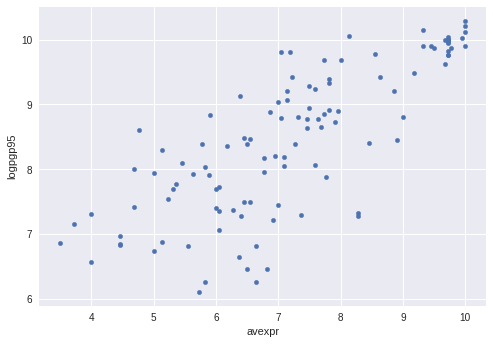

In [105]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn')

df1.plot(x = 'avexpr', y = 'logpgp95', kind = 'scatter')
plt.show()

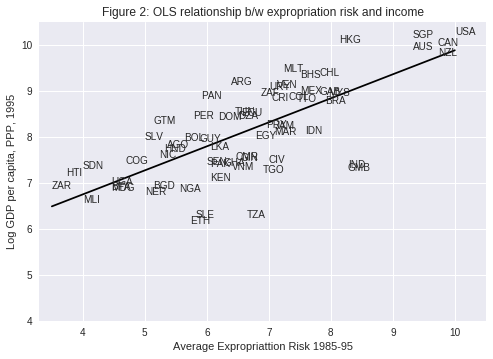

In [106]:
# dropping NAs' is required to use numpy's polyfit
df1_subset = df1.dropna(subset = ['logpgp95', 'avexpr'])

# use only 'base sample' for plotting purposes
df1_subset = df1_subset[df1_subset['baseco'] == 1]

X = df1_subset['avexpr']
y = df1_subset['logpgp95']
labels = df1_subset['shortnam']

# replace markers with country labels
plt.scatter(X, y, marker = '')

for i, label in enumerate(labels):
  plt.annotate(label, (X.iloc[i], y.iloc[i]))
  
# Fit a linear trend line
plt.plot(np.unique(X),
         np.poly1d(np.polyfit(X, y, 1))(np.unique(X)),
         color = 'black')

plt.xlim([3.3, 10.5])
plt.ylim([4, 10.5])
plt.xlabel('Average Expropriattion Risk 1985-95')
plt.ylabel('Log GDP per capita, PPP, 1995')
plt.title('Figure 2: OLS relationship b/w expropriation risk and income')
plt.show()

In [0]:
df1['const'] = 1

In [108]:
import statsmodels.api as sm

reg1 = sm.OLS(endog = df1['logpgp95'],
              exog = df1[['const', 'avexpr']],
              missing = 'drop')

type(reg1)

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


statsmodels.regression.linear_model.OLS

In [109]:
results = reg1.fit()

type(results)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [110]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               logpgp95   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     171.4
Date:                Tue, 26 Feb 2019   Prob (F-statistic):           4.16e-24
Time:                        16:41:40   Log-Likelihood:                -119.71
No. Observations:                 111   AIC:                             243.4
Df Residuals:                     109   BIC:                             248.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6261      0.301     15.391      0.0

In [111]:
mean_expr = np.mean(df1_subset['avexpr'])

mean_expr

6.515625

In [112]:
predicted_logpdp95 = 4.63 + 0.53 * 7.07

predicted_logpdp95

8.3771

In [113]:
results.predict(exog = [1, mean_expr])

array([8.09156367])

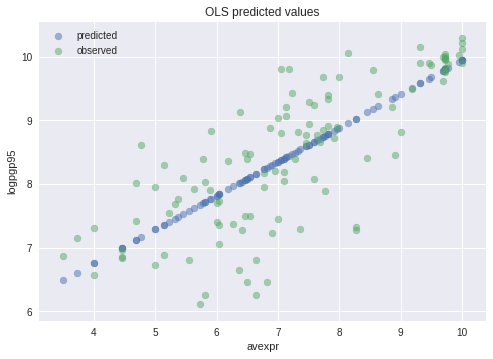

In [114]:
# drop missing observations from whole sample
df1_plot = df1.dropna(subset = ['logpgp95', 'avexpr'])

# plot predicted values
plt.scatter(df1_plot['avexpr'], results.predict(),
            alpha = 0.5, label = 'predicted')

# plot observed values
plt.scatter(df1_plot['avexpr'], df1_plot['logpgp95'],
            alpha = 0.5, label = 'observed')

plt.legend()
plt.title('OLS predicted values')
plt.xlabel('avexpr')
plt.ylabel('logpgp95')
plt.show()

## pd.read_feather()

In [115]:
df = pd.DataFrame({'a': list('abc'),
                   'b': list(range(1, 4)),
                   'c': np.arange(3, 6).astype('u1'),
                   'd': np.arange(4.0, 7.0, dtype = 'float64'),
                   'e': [True, False, True],
                   'f': pd.Categorical(list('abc')),
                   'g': pd.date_range('20130101', periods = 3),
                   'h': pd.date_range('20130101', periods = 3, tz = 'US/Eastern'),
                   'i': pd.date_range('20130101', periods = 3, freq = 'ns')})

df

,a,b,c,d,e,f,g,h,i
0,a,1,3,4.0,True,a,2013-01-01,2013-01-01 00:00:00-05:00,2013-01-01
1,b,2,4,5.0,False,b,2013-01-02,2013-01-02 00:00:00-05:00,2013-01-01
2,c,3,5,6.0,True,c,2013-01-03,2013-01-03 00:00:00-05:00,2013-01-01


In [116]:
df.dtypes

a                        object
b                         int64
c                         uint8
d                       float64
e                          bool
f                      category
g                datetime64[ns]
h    datetime64[ns, US/Eastern]
i                datetime64[ns]
dtype: object

In [117]:
!pip install -U feather-format

df.to_feather('example.feather')

    100% |████████████████████████████████| 12.4MB 3.0MB/s 
  Stored in directory: /root/.cache/pip/wheels/85/7d/12/2dfa5c0195f921ac935f5e8f27deada74972edc0ae9988a9c1
Successfully built feather-format


In [118]:
import feather

result = feather.read_dataframe('example.feather')
result

,a,b,c,d,e,f,g,h,i
0,a,1,3,4.0,True,a,2013-01-01,2013-01-01 00:00:00-05:00,2013-01-01
1,b,2,4,5.0,False,b,2013-01-02,2013-01-02 00:00:00-05:00,2013-01-01
2,c,3,5,6.0,True,c,2013-01-03,2013-01-03 00:00:00-05:00,2013-01-01


In [119]:
# dtypes are preserved

result.dtypes

a                        object
b                         int64
c                         uint8
d                       float64
e                          bool
f                      category
g                datetime64[ns]
h    datetime64[ns, US/Eastern]
i                datetime64[ns]
dtype: object

## Back to book content

In [120]:
uploaded = files.upload()

Saving ex1.csv to ex1.csv


In [121]:
!cat ex1.csv

a,b,c,d,message
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo

In [122]:
df = pd.read_csv('ex1.csv')

df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [123]:
pd.read_table('ex1.csv', sep = ',')

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [124]:
uploaded = files.upload()

Saving ex2.csv to ex2.csv


In [125]:
!cat ex2.csv

1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo

In [126]:
pd.read_csv('ex2.csv', header = None)

,0,1,2,3,4
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [127]:
pd.read_csv('ex2.csv', names = ['a', 'b', 'c', 'd', 'message'])

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [0]:
names = ['a', 'b', 'c', 'd', 'message']

In [129]:
pd.read_csv('ex2.csv', names = names, index_col = 'message')

,a,b,c,d
message,,,,
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


In [130]:
uploaded = files.upload()

Saving csv_mindex.csv to csv_mindex.csv


In [131]:
!cat csv_mindex.csv

key1,key2,value1,value2
one,a,1,2
one,b,3,4
one,c,5,6
one,d,7,8
two,a,9,10
two,b,11,12
two,c,13,14
two,d,15,16


In [132]:
parsed = pd.read_csv('csv_mindex.csv',
                     index_col = ['key1', 'key2'])

parsed

value1  value2
key1 key2                
one  a          1       2
     b          3       4
     c          5       6
     d          7       8
two  a          9      10
     b         11      12
     c         13      14
     d         15      16

In [133]:
uploaded = files.upload()

Saving ex3.txt to ex3.txt


In [134]:
list(open('ex3.txt'))

['            A         B         C\n',
 'aaa -0.264438 -1.026059 -0.619500\n',
 'bbb  0.927272  0.302904 -0.032399\n',
 'ccc -0.264273 -0.386314 -0.217601\n',
 'ddd -0.871858 -0.348382  1.100491\n']

In [135]:
result = pd.read_table('ex3.txt', sep = '\s+')

result

,A,B,C
aaa,-0.264438,-1.026059,-0.619500
bbb,0.927272,0.302904,-0.032399
ccc,-0.264273,-0.386314,-0.217601
ddd,-0.871858,-0.348382,1.100491


In [136]:
uploaded = files.upload()

Saving ex4.csv to ex4.csv


In [137]:
!cat ex4.csv

# hey!
a,b,c,d,message
# just wanted to make things more difficult for you
# who reads CSV files with computers, anyway?
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo

In [138]:
pd.read_csv('ex4.csv', skiprows = [0, 2, 3])

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [139]:
uploaded = files.upload()

Saving ex5.csv to ex5.csv


In [140]:
!cat ex5.csv

something,a,b,c,d,message
one,1,2,3,4,NA
two,5,6,,8,world
three,9,10,11,12,foo

In [0]:
result = pd.read_csv('ex5.csv')

In [142]:
result

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [143]:
pd.isnull(result)

,something,a,b,c,d,message
0,False,False,False,False,False,True
1,False,False,False,True,False,False
2,False,False,False,False,False,False


In [144]:
result = pd.read_csv('ex5.csv', na_values = ['NULL'])

result

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [0]:
sentinels = {'message': ['foo', 'NA'],
             'something': ['two']}

In [146]:
pd.read_csv('ex5.csv', na_values = sentinels)

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,NaN,5,6,NaN,8,world
2,three,9,10,11.0,12,NaN


## Reading Text Files in Pieces

In [0]:
pd.options.display.max_rows = 10

In [148]:
uploaded = files.upload()

Saving ex6.csv to ex6.csv


In [149]:
result = pd.read_csv('ex6.csv')

result

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q
...,...,...,...,...,...
9995,2.311896,-0.417070,-1.409599,-0.515821,L
9996,-0.479893,-0.650419,0.745152,-0.646038,E
9997,0.523331,0.787112,0.486066,1.093156,K
9998,-0.362559,0.598894,-1.843201,0.887292,G


In [150]:
pd.read_csv('ex6.csv', nrows = 5)

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q


In [151]:
chunker = pd.read_csv('ex6.csv', chunksize = 1000)

chunker

In [0]:
tot = pd.Series([])

for piece in chunker:
  tot = tot.add(piece['key'].value_counts(), fill_value = 0)

tot = tot.sort_values(ascending = False)

In [153]:
tot[:10]

E    368.0
X    364.0
L    346.0
O    343.0
Q    340.0
M    338.0
J    337.0
F    335.0
K    334.0
H    330.0
dtype: float64

## Writing Data to Text Format

In [154]:
data = pd.read_csv('ex5.csv')

data

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [0]:
data.to_csv('out.csv')

In [156]:
!cat out.csv

,something,a,b,c,d,message
0,one,1,2,3.0,4,
1,two,5,6,,8,world
2,three,9,10,11.0,12,foo


In [0]:
import sys

In [158]:
data.to_csv(sys.stdout, sep = '|')

|something|a|b|c|d|message
0|one|1|2|3.0|4|
1|two|5|6||8|world
2|three|9|10|11.0|12|foo


In [159]:
data.to_csv(sys.stdout, na_rep = 'NULL')

,something,a,b,c,d,message
0,one,1,2,3.0,4,NULL
1,two,5,6,NULL,8,world
2,three,9,10,11.0,12,foo


In [160]:
data.to_csv(sys.stdout, index = False, header = False)

one,1,2,3.0,4,
two,5,6,,8,world
three,9,10,11.0,12,foo


In [161]:
data.to_csv(sys.stdout, index = False, columns = ['a', 'b', 'c'])

a,b,c
1,2,3.0
5,6,
9,10,11.0


In [0]:
dates = pd.date_range('1/1/2000', periods = 7)

In [0]:
ts = pd.Series(np.arange(7), index = dates)

In [0]:
ts.to_csv('tseries.csv')

In [165]:
!cat tseries.csv

2000-01-01,0
2000-01-02,1
2000-01-03,2
2000-01-04,3
2000-01-05,4
2000-01-06,5
2000-01-07,6


## Working with Delimited Formats

In [166]:
uploaded = files.upload()

Saving ex7.csv to ex7.csv


In [167]:
!cat ex7.csv

"a","b","c"
"1","2","3"
"1","2","3"


In [0]:
import csv

f = open('ex7.csv')

reader = csv.reader(f)

In [169]:
for line in reader:
  print(line)

['a', 'b', 'c']
['1', '2', '3']
['1', '2', '3']


In [0]:
with open('ex7.csv') as f:
  lines = list(csv.reader(f))

In [0]:
header, values = lines[0], lines[1:]

In [172]:
data_dict = {h: v for h, v in zip(header, zip(*values))}

data_dict

{'a': ('1', '1'), 'b': ('2', '2'), 'c': ('3', '3')}

In [0]:
class my_dialect(csv.Dialect):
  lineterminator = '\n'
  delimiter = ';'
  quotechar = '"'
  quoting = csv.QUOTE_MINIMAL

In [176]:
f = open('ex7.csv')

reader = csv.reader(f, dialect = my_dialect)

reader

In [0]:
reader = csv.reader(f, delimiter = '|')

## Exploring CSV Dialect options

In [177]:
data = 'label1, label2, label3\n index1, "a, c, e\n index2, b, d, f'

print(data)

label1, label2, label3
 index1, "a, c, e
 index2, b, d, f


In [0]:
dia = csv.excel()

dia.quoting = csv.QUOTE_NONE

In [179]:
from pandas.compat import StringIO, BytesIO

pd.read_csv(StringIO(data), dialect = dia)

/usr/local/lib/python3.6/dist-packages/pandas/io/parsers.py:449: ParserWarning: Conflicting values for 'quoting': '0' was provided, but the dialect specifies '3'. Using the dialect-specified value.
  parser = TextFileReader(filepath_or_buffer, **kwds)


,label1,label2,label3
index1,"""a",c,e
index2,b,d,f


In [180]:
data = 'a, b, c~1, 2, 3~4, 5, 6'

pd.read_csv(StringIO(data), lineterminator = '~')

,a,b,c
0,1,2,3
1,4,5,6


In [181]:
data = 'a, b, c\n1, 2, 3\n4, 5, 6'

print(data)

a, b, c
1, 2, 3
4, 5, 6


In [182]:
pd.read_csv(StringIO(data), skipinitialspace = True)

,a,b,c
0,1,2,3
1,4,5,6


In [183]:
data = 'a,b\n"hello, \\"Bob\\", nice to see you",5'

print(data)

a,b
"hello, \"Bob\", nice to see you",5


In [184]:
pd.read_csv(StringIO(data), escapechar = '\\')

,a,b
0,"hello, ""Bob"", nice to see you",5


## Back to book content

In [0]:
with open('mydata.csv', 'w') as f:
  writer = csv.writer(f, dialect = my_dialect)
  writer.writerow(('one', 'two', 'three'))
  writer.writerow(('1', '2', '3'))
  writer.writerow(('4', '5', '6'))
  writer.writerow(('7', '8', '9'))

## JSON Data

In [0]:
obj = """
{
  "name": "Wes",
  "places_lived": ["United States", "Spain", "Germany"],
  "pet": null,
  "siblings": [{ "name": "Scott", "age": 30, "pets": ["Zeus", "Zuko"]},
               { "name": "Katie", "age": 38,
                 "pets": ["Sixes", "Stache", "Cisco"] }]
}
"""

In [0]:
import json

In [188]:
result = json.loads(obj)

result

{'name': 'Wes',
 'pet': None,
 'places_lived': ['United States', 'Spain', 'Germany'],
 'siblings': [{'age': 30, 'name': 'Scott', 'pets': ['Zeus', 'Zuko']},
  {'age': 38, 'name': 'Katie', 'pets': ['Sixes', 'Stache', 'Cisco']}]}

In [0]:
asjson = json.dumps(result)

In [190]:
siblings = pd.DataFrame(result['siblings'],
                        columns = ['name', 'age'])

siblings

,name,age
0,Scott,30
1,Katie,38


In [191]:
uploaded = files.upload()

Saving example.json.txt to example.json (1).txt


In [192]:
!cat example.json.txt

[{"a": 1, "b": 2, "c": 3},
 {"a": 4, "b": 5, "c": 6},
 {"a": 7, "b": 8, "c": 9}]


In [193]:
data = pd.read_json('example.json.txt')

data

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


In [194]:
print(data.to_json())

{"a":{"0":1,"1":4,"2":7},"b":{"0":2,"1":5,"2":8},"c":{"0":3,"1":6,"2":9}}


In [195]:
print(data.to_json(orient = 'records'))

[{"a":1,"b":2,"c":3},{"a":4,"b":5,"c":6},{"a":7,"b":8,"c":9}]
